In [1]:
from pulp import *
import numpy as np
import pandas as pd
model = LpProblem("Ütemezési feladat", LpMinimize)

C:\Users\Csoni\AppData\Roaming\Python\Python39\site-packages\pulp\pulp.py:1352: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


In [2]:
import tsplib95
import matplotlib.pyplot as plt
import scipy
import networkx as nx
import numpy as np

In [3]:
problem = tsplib95.load("gr48.tsp")
G = problem.get_graph()

In [4]:
def seged(i):
    if i==0:
        return 0
    else:
        return 1

In [5]:
# for some reason some gr input starts nodes from 0 not 1 // this is a correction for that
nx.relabel_nodes(G,{key: value for (key, value) in [(i,i+1) for i in range(len(G.nodes))]},copy=False) # for gr17 gr22 gr48
G.nodes

NodeView((48, 47, 46, 45, 44, 43, 42, 41, 40, 39, 38, 37, 36, 35, 34, 33, 32, 31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1))

In [6]:
edges=[([] if seged(G[j][i]["weight"])==0 else (i,j) if k==0 else (j,i)) for k in range(2) for i in range(1,len(G.nodes)+1) for j in range(i+1,len(G.nodes)+1)]
var_X = LpVariable.dicts("X", edges, cat="Integer", lowBound=0,upBound=1)

model += lpSum(var_X[(1,i)] for i in range(2,len(G.nodes)+1)) >=1
model += lpSum(var_X[(i,1)] for i in range(2,len(G.nodes)+1)) ==0

for i in range(2,len(G.nodes)+1):
    model += lpSum(var_X[(j,i)] if j!= i else [] for j in range(1,len(G.nodes)+1)) ==1
    
model += lpSum(var_X[e]*G[e[0]][e[1]]["weight"] for e in edges)
    
print(model)        

Ütemezési_feladat:
MINIMIZE
593*X_(1,_10) + 150*X_(1,_11) + 659*X_(1,_12) + 80*X_(1,_13) + 434*X_(1,_14) + 455*X_(1,_15) + 134*X_(1,_16) + 649*X_(1,_17) + 259*X_(1,_18) + 505*X_(1,_19) + 593*X_(1,_2) + 710*X_(1,_20) + 488*X_(1,_21) + 353*X_(1,_22) + 324*X_(1,_23) + 605*X_(1,_24) + 372*X_(1,_25) + 330*X_(1,_26) + 581*X_(1,_27) + 154*X_(1,_28) + 70*X_(1,_29) + 409*X_(1,_3) + 606*X_(1,_30) + 585*X_(1,_31) + 544*X_(1,_32) + 496*X_(1,_33) + 317*X_(1,_34) + 648*X_(1,_35) + 211*X_(1,_36) + 475*X_(1,_37) + 654*X_(1,_38) + 710*X_(1,_39) + 566*X_(1,_4) + 585*X_(1,_40) + 246*X_(1,_41) + 788*X_(1,_42) + 446*X_(1,_43) + 166*X_(1,_44) + 523*X_(1,_45) + 235*X_(1,_46) + 369*X_(1,_47) + 121*X_(1,_48) + 633*X_(1,_5) + 257*X_(1,_6) + 91*X_(1,_7) + 412*X_(1,_8) + 378*X_(1,_9) + 593*X_(10,_1) + 541*X_(10,_11) + 76*X_(10,_12) + 563*X_(10,_13) + 595*X_(10,_14) + 158*X_(10,_15) + 575*X_(10,_16) + 649*X_(10,_17) + 403*X_(10,_18) + 660*X_(10,_19) + 416*X_(10,_2) + 533*X_(10,_20) + 488*X_(10,_21) + 353*X_(10,_22

Minimális súlyú fa megtalálva:


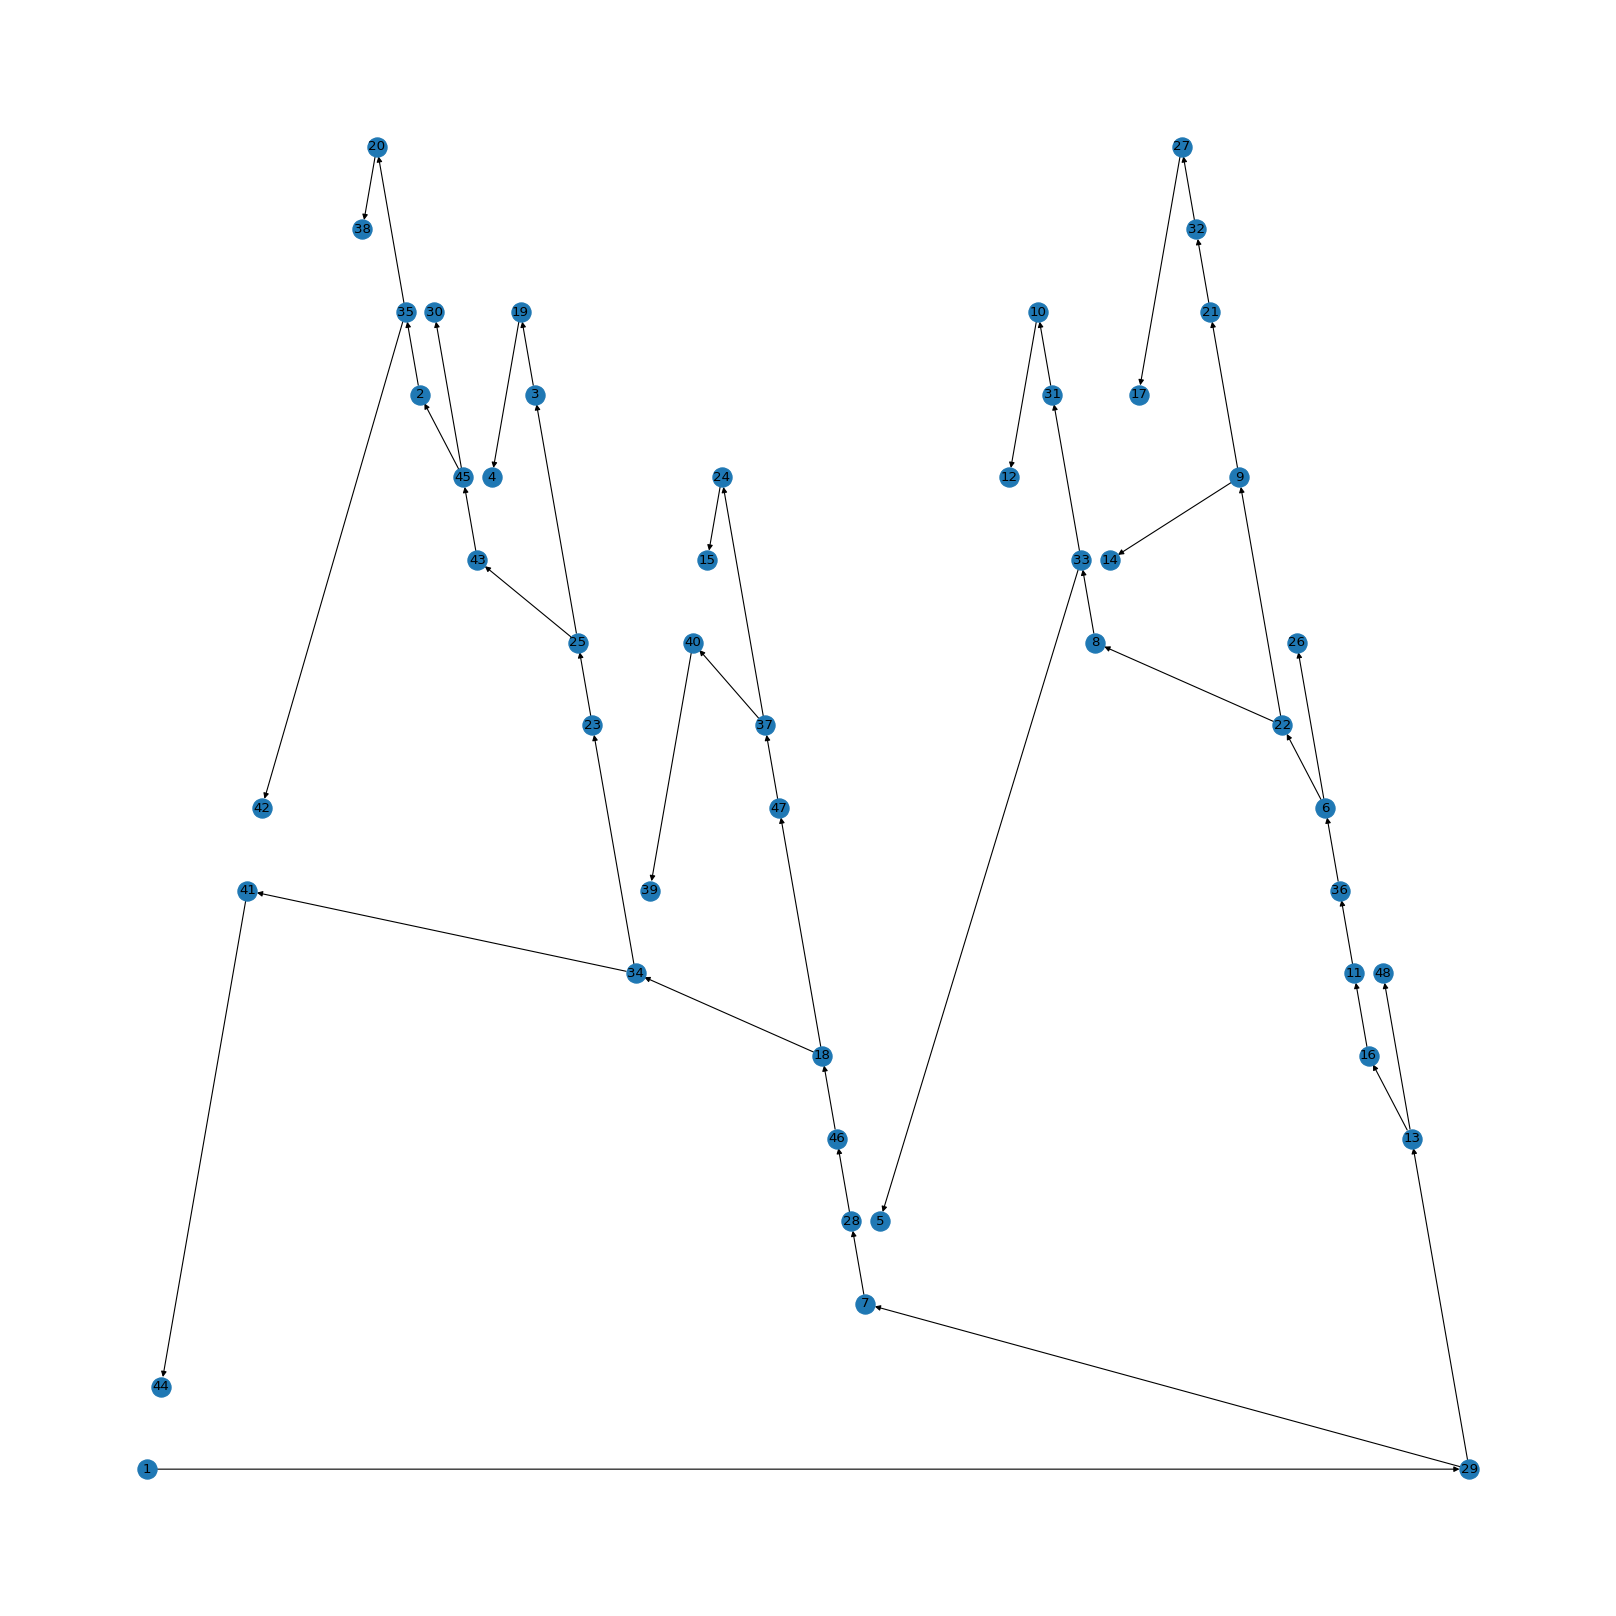

status: 1, Optimal
objective: 4082.0
CPU times: total: 3.86 s
Wall time: 12 s


In [7]:
%%time

c=0
while True:
    model.solve()
    Gr=nx.empty_graph(create_using=nx.DiGraph())
    for e in edges:
        if var_X[(e[0],e[1])].value()==1:
            Gr.add_edge(e[0], e[1])
    try:
        cyc=nx.find_cycle(Gr, orientation="original")
        model += lpSum(var_X[(e[0],e[1])] for e in cyc)<= len(cyc)-1
        
#        c=c+1
#        if c%20==0:
#            print(c, cyc, len(cyc)-1)
#            plt.figure(figsize=(20, 20), dpi=80)
#            nx.draw_planar(Gr, with_labels=True)
#            plt.show() 

    except:
        print("Minimális súlyú fa megtalálva:")
        plt.figure(figsize=(20, 20), dpi=80)
        nx.draw_planar(Gr, with_labels=True)
        plt.show()
        print(f"status: {model.status}, {LpStatus[model.status]}")
        print(f"objective: {model.objective.value()}")

        #for var in var_X.values():
        #    print(f"{var.name}: {var.value()}")

        #for name, constraint in model.constraints.items():
        #    print(f"{name}: {constraint.value()}")

        break

        

            

Megjegyzés: Ez nagyon nem hatékony a pontozott kordináták esetén, ott lényegében, ha két egymástól messze lévő ponthalmaz van, akkor legalább az egyikből lényegében az összes kört ki kéne zárni és az nagyon soká tart már nem sok csúcs esetén is.

Amúgy meg a Kruskal algoritmus sokkal hatékonyabb lenne. Lásd:

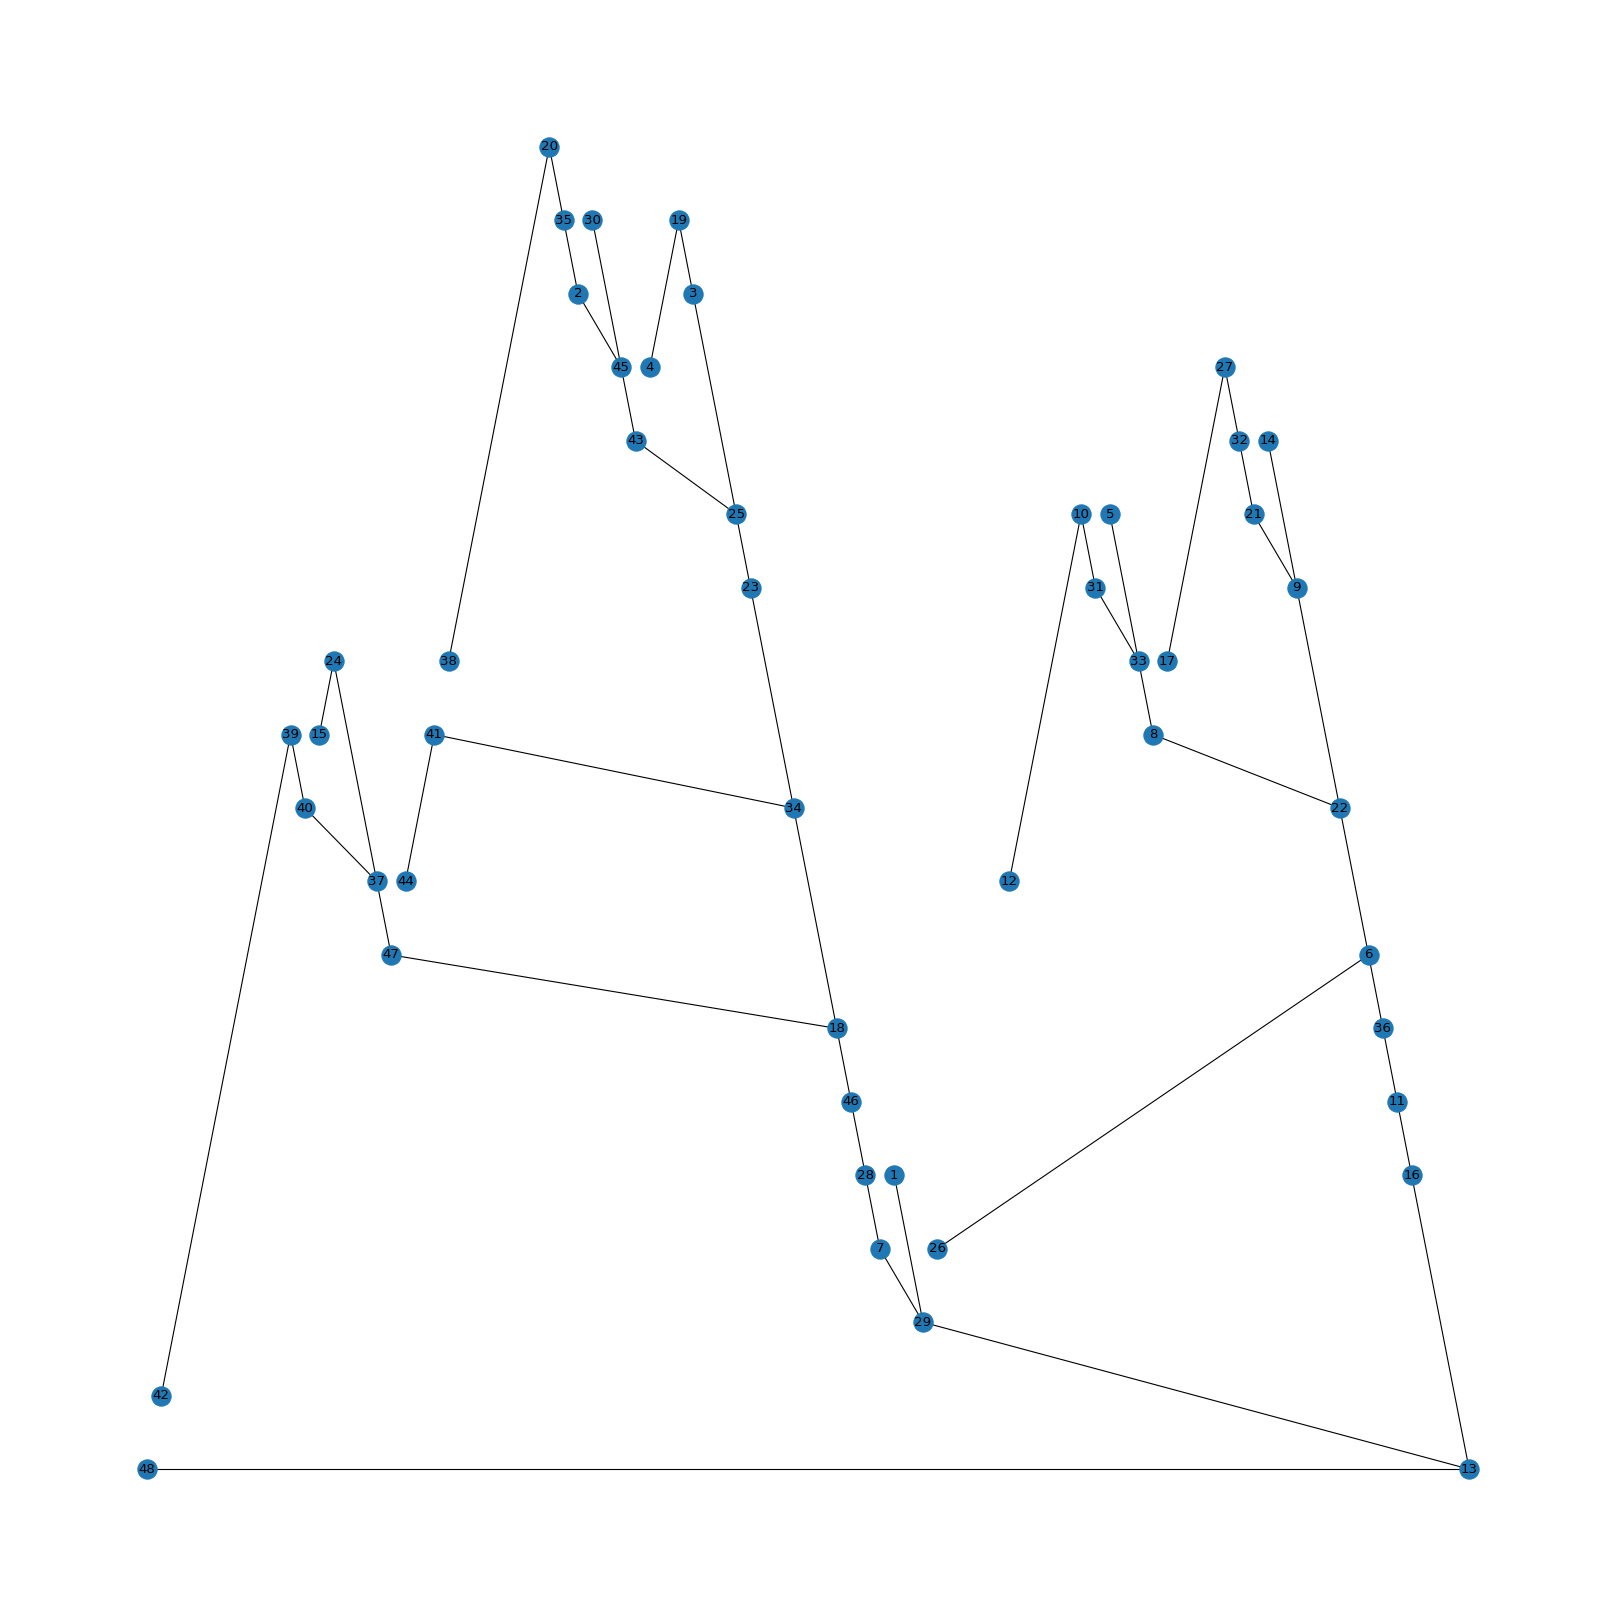

4082
[48, 47, 46, 45, 44, 43, 42, 41, 40, 39, 38, 37, 36, 35, 34, 33, 32, 31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
CPU times: total: 359 ms
Wall time: 393 ms


In [8]:
%%time
T=nx.minimum_spanning_tree(G, weight='weight')
plt.figure(figsize=(20, 20), dpi=80)
nx.draw_planar(T, with_labels=True)
plt.show()
print(sum(w[2]["weight"] for w in T.edges(data=True)))
print(G.nodes)
